In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

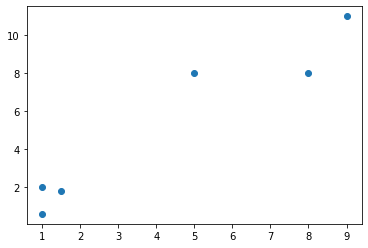

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [23]:
k_means = KMeans(n_clusters=2)

In [24]:
k_means.fit(X)

KMeans(n_clusters=2)

In [25]:
#which point belongs to which cluster
k_means.labels_

array([1, 1, 0, 0, 1, 0], dtype=int32)

In [26]:
#cluster means
k_means.cluster_centers_

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

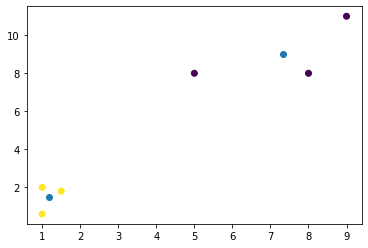

In [27]:
plt.scatter(X[:,0],X[:,1],c=k_means.labels_) #c is colour
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

## Self Implementation

In [57]:
class K_Means:
    def __init__(self,k=2,max_iter=100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
    def fit(self,data):
        self.means = []
        #randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            #assign the data points to the cluster that they belong to
            #create empty clusters
            clusters = []
            for j in range(self.k): 
                clusters.append([])
            for point in data:
                #find distance to all the means values
                distances = [((point-m)**2).sum() for m in self.means]
                #find the min value
                mindist = min(distances)
                #find the mean for which we got the min distance-->l
                l = distances.index(mindist)
                #add this point to cluster l
                clusters[l].append(point)
                
            #calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j],axis=0)
                #providing axis is imp in the step above to treat x and y as two separate features
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self,test_data):
        predictions = []
        for point in test_data:
            #find distance to all the means values
            distances = [((point-m)**2).sum() for m in means]
            #find the min value
            mindist = min(distances)
            #find the mean for which we got the min distance-->l
            l = distances.index(mindist)
            #add this point to cluster l
            predictions.append(l)
        return predictions

In [43]:
means = fit(X)

In [44]:
predict(X,means)

[0, 0, 1, 1, 0, 1]

In [58]:
kmeans = K_Means(2,10)

constructor


In [59]:
kmeans.fit(X)

In [60]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [61]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]